# The Effect of Playoff Wins on Personal Seat Licenses in the NFL

#### Principal Investigator: Esther Chao <br> Email: [ec2635@stern.nyu.edu](ec2635@stern.nyu.edu)

This project studies how on-field performance during the NFL post-season, specifically Superbowl wins, affect secondary market sales of NFL personal seat licenses (PSLs). PSLs are one-time fees that transfer stadium seat ownership rights from the team to the licensee, thus enabling the licensee to purchase season tickets. Teams only sell a fixed amount of seat licenses at face value. Since futher PSLs transactions take place on a secondary market, the effect of playoff wins on supply and demand is unclear. In order to meet increased demand, there must be a large group of fans willing to sell their own seat license rights.

This study will focus on the quantity and prices of PSLs for eight NFL teams:
* Baltimore Ravens
* Chicago Bears
* Cincinnati Bengals
* Houston Texans
* New York Giants
* Philadephia Eagles
* Pittsurgh Steelers
* Seattle Seahawks

Post-seasons after playoff appearances and Superbowl wins will be analyzed and compared to trends found within season and non-win post-seasons.

----

## Data Cleaning

**Overview:** My data comes from STR Marketplace, an online brokerage for PSLs. It uploads cumulative Excel spreadsheets each month with transaction-level details of sales transactions. Below I demonstrate I have the ability to access the data.

**Requisite Packages:** Below I bring in the packages I need...

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt    

**Grabbing the data:** Here are all eight URLs to the website's Excel spreadsheets.

In [2]:
url_BAL = "https://ravens.seasonticketrights.com/Images/Teams/BaltimoreRavens/SalesData/Baltimore-Ravens-Sales-Data-PSLs.xls"

In [3]:
url_CHI = "https://bears.seasonticketrights.com/Images/Teams/ChicagoBears/SalesData/Chicago-Bears-Sales-Data.xls"

In [4]:
url_CIN = "https://bengals.seasonticketrights.com/Images/Teams/CincinnatiBengals/SalesData/Cincinnati-Bengals-Sales-Data.xls"

In [5]:
url_HOU = "https://texans.seasonticketrights.com/Images/Teams/HoustonTexans/SalesData/Houston-Texans-Sales-Data.xls"

In [6]:
url_NYG = "https://nygiants.strmarketplace.com/Images/Teams/NewYorkGiants/SalesData/New-York-Giants-Sales-Data.xls"

In [7]:
url_PHI = "https://manage.strmarketplace.com/Images/Teams/PhiladelphiaEagles/SalesData/Philadelphia-Eagles-Sales-Data-PSLs.xls"

In [8]:
url_PIT = "https://steelers.strmarketplace.com/Images/Teams/PittsburghSteelers/SalesData/Pittsburgh-Steelers-Sales-Data.xls"

In [9]:
url_SEA = "https://seahawks.strmarketplace.com/Images/Teams/SeattleSeahawks/SalesData/Seattle-Seahawks-Sales-Data.xls"

**Combining the Data:** Next I will read it all in, skipping the headers and making each consistent to merge into one cohesive sample.

In [10]:
BAL = pd.read_excel(url_BAL,
                    skiprows = 8) # This reads in each team's respective spreadsheet, ignoring the header.

In [11]:
CHI = pd.read_excel(url_CHI,
                    skiprows = 8)

In [12]:
CIN = pd.read_excel(url_CIN,
                    skiprows = 8)

In [13]:
HOU = pd.read_excel(url_HOU,
                    skiprows = 8)

In [14]:
NYG = pd.read_excel(url_NYG,
                    skiprows = 8)

In [15]:
PHI = pd.read_excel(url_PHI,
                    skiprows = 8)

In [16]:
PIT = pd.read_excel(url_PIT,
                    skiprows = 8)

In [17]:
SEA = pd.read_excel(url_SEA,
                    skiprows = 8)

In [18]:
CIN = CIN[["Date", "# Seats", "Seating Area", "Section", "Row", "Total Price"]] # Four of our data sets require 
                                                                                # removing unnamed columns.

In [19]:
NYG = NYG[["Date", "# Seats", "Seating Area", "Section", "Row", "Total Price"]]

In [20]:
PHI = PHI[["Date", "# Seats", "Seating Area", "Section", "Row", "Total Price"]]

In [21]:
SEA = SEA[["Date", "# Seats", "Seating Area", "Section", "Row", "Total Price"]]

In [22]:
# I realized through working with this data in the past that Per Seat Price they give is not always correct.

sublist = [BAL, CHI, HOU, PIT] # These are the four teams with an original Per Seat Price column uploaded.

for team in sublist:
    team.drop(["Per Seat Price"], axis = 1, inplace = True) # Drops the column

In [23]:
list = [BAL, CHI, CIN, HOU, NYG, PHI, PIT, SEA] # List of all the data sets

for team in list:
    team["Per Seat Price"] = team["Total Price"] / team["# Seats"] # Creates a new column for Per Seat Price

In [24]:
for team in list:
    team.set_index("Date", inplace = True) # Sets date as the index

In [25]:
BAL["Team"] = "BAL" # Adds a column for team identifiers so transactions within the large sample can still be attributed
                    # to a team 

In [26]:
CHI["Team"] = "CHI"

In [27]:
CIN["Team"] = "CIN"

In [28]:
HOU["Team"] = "HOU"

In [29]:
NYG["Team"] = "NYG"

In [30]:
PHI["Team"] = "PHI"

In [31]:
PIT["Team"] = "PIT"

In [32]:
SEA["Team"] = "SEA"

In [33]:
ALL = BAL.append([CHI, CIN, HOU, NYG, PHI, PIT, SEA]) # Merges the eight data sets into one big sample

ALL.head() # Just checking the column headers

,# Seats,Seating Area,Section,Row,Total Price,Per Seat Price,Team
Date,,,,,,,
2007-05-18,2,Lower Level End Zone (C),112,15,11000,5500.0,BAL
2007-05-22,2,Club Level III Corner,222,9,10000,5000.0,BAL
2007-05-22,2,Club Level III Corner,220,11,8500,4250.0,BAL
2007-05-22,1,Club Level IV End Zone,208,11,3000,3000.0,BAL
2007-05-22,4,Lower Level Sideline (B),102,6,40000,10000.0,BAL


In [34]:
ALL.shape # The final sample we are working with contains 14,395 transactions across eight teams.

(14395, 7)

**Segmenting the Data:** Next, because we're interested in post-season performance, we must separate the final sample into seasons and off-seasons.

In [35]:
offseason07 = ALL[(ALL.index < '2007-09-06')] # This means every transaction before 9-6-07 belongs to the 2007 Offseason.

In [36]:
offseason07["Category"] = "2007 Offseason" # This assigns a season identifier to the transactions.

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
offseason07["InorOff"] = "Offseason" # This assigns an identifier as to whether this is inseason or offseason.

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
season07 = ALL[(ALL.index >= '2007-09-06') & (ALL.index <= '2008-02-03')] # This means every transaction between 9-6-07 and
                                                                            # 2-3-08 belongs to the 2007 Season, including
                                                                            # the given dates, which were start of season and
                                                                            # the Superbowl.

In [39]:
season07["Category"] = "2007 Season" # Again, this assigns aseason identifier to the transactions.

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
season07["InorOff"] = "In-Season" # Again, this assigns an identifier as to whether this is inseason or offseason.

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
offseason08 = ALL[(ALL.index > '2008-02-03') & (ALL.index < '2008-09-04')] # We repeat the above process until present day.

In [42]:
offseason08["Category"] = "2008 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
offseason08["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
season08 = ALL[(ALL.index >= '2008-09-04') & (ALL.index <= '2009-02-01')]

In [45]:
season08["Category"] = "2008 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
season08["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
offseason09 = ALL[(ALL.index > '2009-02-01') & (ALL.index < '2009-09-10')]

In [48]:
offseason09["Category"] = "2009 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
offseason09["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
season09 = ALL[(ALL.index >= '2009-09-10') & (ALL.index <= '2010-02-07')]

In [51]:
season09["Category"] = "2009 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
season09["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
offseason10 = ALL[(ALL.index > '2010-02-07') & (ALL.index < '2010-09-09')]

In [54]:
offseason10["Category"] = "2010 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
offseason10["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
season10 = ALL[(ALL.index >= '2010-09-09') & (ALL.index <= '2011-02-06')]

In [57]:
season10["Category"] = "2010 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
season10["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
offseason11 = ALL[(ALL.index > '2011-02-06') & (ALL.index < '2011-09-08')]

In [60]:
offseason11["Category"] = "2011 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
offseason11["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
season11 = ALL[(ALL.index >= '2011-09-08') & (ALL.index <= '2012-02-05')]

In [63]:
season11["Category"] = "2011 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
season11["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
offseason12 = ALL[(ALL.index > '2012-02-05') & (ALL.index < '2012-09-05')]

In [66]:
offseason12["Category"] = "2012 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
offseason12["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
season12 = ALL[(ALL.index >= '2012-09-05') & (ALL.index <= '2013-02-03')]

In [69]:
season12["Category"] = "2012 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
season12["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
offseason13 = ALL[(ALL.index > '2013-02-03 ') & (ALL.index < '2013-09-05')]

In [72]:
offseason13["Category"] = "2013 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
offseason13["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
season13 = ALL[(ALL.index >= '2013-09-05') & (ALL.index <= '2014-02-02')]

In [75]:
season13["Category"] = "2013 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
season13["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
offseason14 = ALL[(ALL.index > '2014-02-02') & (ALL.index < '2014-09-04')]

In [78]:
offseason14["Category"] = "2014 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
offseason14["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
season14 = ALL[(ALL.index >= '2014-09-04') & (ALL.index <= '2015-02-01')]

In [81]:
season14["Category"] = "2014 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
season14["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
offseason15 = ALL[(ALL.index > '2015-02-01') & (ALL.index < '2015-09-10')]

In [84]:
offseason15["Category"] = "2015 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
offseason15["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
season15 = ALL[(ALL.index >= '2015-09-10') & (ALL.index <= '2016-02-07')]

In [87]:
season15["Category"] = "2015 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
season15["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
offseason16 = ALL[(ALL.index > '2016-02-07') & (ALL.index < '2016-09-08')]

In [90]:
offseason16["Category"] = "2016 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
offseason16["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
season16 = ALL[(ALL.index >= '2016-09-08') & (ALL.index <= '2017-02-05')]

In [93]:
season16["Category"] = "2016 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
season16["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
offseason17 = ALL[(ALL.index > '2017-02-05') & (ALL.index < '2017-09-07')]

In [96]:
offseason17["Category"] = "2017 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
offseason17["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
season17 = ALL[(ALL.index >= '2017-09-07') & (ALL.index <= '2018-02-07')]

In [99]:
season17["Category"] = "2017 Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
season17["InorOff"] = "In-Season"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
offseason18 = ALL[(ALL.index > '2018-02-07')] # Finally, this says that everything after this past Superbowl is part of
                                                # the 2018 offseason.

In [102]:
offseason18["Category"] = "2018 Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
offseason18["InorOff"] = "Offseason"

C:\Users\Esther Chao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
ALLbyseasons = offseason07.append([season07, offseason08, season08, offseason09, season09, offseason10, season10, offseason11,
                                  season11, offseason12, season12, offseason13, season13, offseason14, season14, offseason15,
                                  season15, offseason16, season16, offseason17, season17, offseason18])

# Now we create a new sample merging all of these together with the seasons listed.

ALLbyseasons.head() # Checks the headers

,# Seats,Seating Area,Section,Row,Total Price,Per Seat Price,Team,Category,InorOff
Date,,,,,,,,,
2007-05-18,2,Lower Level End Zone (C),112,15,11000,5500.0,BAL,2007 Offseason,Offseason
2007-05-22,2,Club Level III Corner,222,9,10000,5000.0,BAL,2007 Offseason,Offseason
2007-05-22,2,Club Level III Corner,220,11,8500,4250.0,BAL,2007 Offseason,Offseason
2007-05-22,1,Club Level IV End Zone,208,11,3000,3000.0,BAL,2007 Offseason,Offseason
2007-05-22,4,Lower Level Sideline (B),102,6,40000,10000.0,BAL,2007 Offseason,Offseason


In [105]:
ALLbyseasons.shape # This matches the height of our previous sample, confirming that we didn't lose any transactions.

(14395, 9)

----

## Analysis 1: Comparing the Average Per Seat Price of a PSL Across the 8 Teams

In [106]:
total = ALL.groupby("Team") # This groups our final sample by team.

In [107]:
avg_per_seat_price = total["Per Seat Price"].mean() # This takes the mean of each our eight teams.

In [108]:
avg_per_seat_price

Team
BAL     3087.085366
CHI     7258.522525
CIN     1303.776579
HOU     3866.594966
NYG     3359.844443
PHI     5437.813659
PIT     6002.265933
SEA    11746.781466
Name: Per Seat Price, dtype: float64

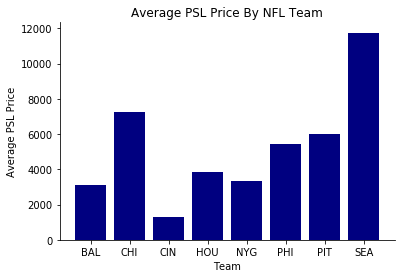

In [181]:
# Here we will graph our results.

fix, ax = plt.subplots()

ax.bar(avg_per_seat_price.index, avg_per_seat_price,
       color = "navy")

ax.set_title("Average PSL Price By NFL Team")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Team")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Analyis 1 Conclusion:** There is a large descrepancy between the average prices of PSL across teams, i.e. 1300 dollars for the average Chicago Bears PSL to nearly 12,000 dollars for the average Seattle Seahawks PSL. The Seattle Seahawks made the playoffs in each of the consecutive four seasons following its partnership with STR Marketplace in February 2012, even winning the Super Bowl in 2013. This prompts us to discover whether or not post-season performance is affecting its expensive price.

----

## Analysis 2: Comparing In-Season PSL Sales Prices with Sales Prices During the Off-Season

In [110]:
inoroffseason = ALLbyseasons.groupby("InorOff") # This groups our sample by whether transactions took place in-season or during
                                                # the off-season.

In [111]:
avg_per_seat_price_inoroffseason = inoroffseason["Per Seat Price"].mean() # This takes the average of each of the 2 categories.

avg_per_seat_price_inoroffseason

InorOff
In-Season    4069.388127
Offseason    4500.986982
Name: Per Seat Price, dtype: float64

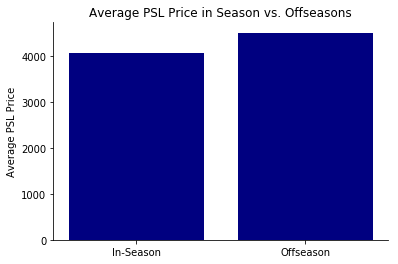

In [183]:
# Here we will graph our results.

fix, ax = plt.subplots()

ax.bar(avg_per_seat_price_inoroffseason.index, avg_per_seat_price_inoroffseason,
       color = "navy")

ax.set_title("Average PSL Price in Season vs. Offseasons")
ax.set_ylabel("Average PSL Price") 

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Analysis 2 Conclusion:** We do see that prices in the off-season are higher on average than prices of transactions that take place during the season. This again prompts us to consider the impact of post-season performance on sales in the offseason, ultimately raising demand and prices.

----

## Analysis 3: Impact of Superbowl Wins on Performance

**Providing a Benchmark for Analysis:** When deciding if there's an impact of Postseason Performance on prices during a team's offseason, we need a benchmark to compare it to. We will use three:

*Benchmark 1. Season leading up to that particular offseason*

*Benchmark 2. Team's average PSL price across all transactions and years (Analysis 1)*

In [113]:
avg_per_seat_price # Average price of each team's PSLs across the entire sample

Team
BAL     3087.085366
CHI     7258.522525
CIN     1303.776579
HOU     3866.594966
NYG     3359.844443
PHI     5437.813659
PIT     6002.265933
SEA    11746.781466
Name: Per Seat Price, dtype: float64

*Benchmark 3. The average price across the team's offseasons.*

In [114]:
inoroffseason_teams = ALLbyseasons.groupby(["InorOff", "Team"]) # Groups by In or Offseason, then by team

In [115]:
avg_per_seat_price_inoroffseason_teams = inoroffseason_teams["Per Seat Price"].mean()

avg_per_seat_price_inoroffseason_teams # Acts as a benchmark for how expensive a team's PSLs are during in or off-season.

InorOff    Team
In-Season  BAL      3015.057828
           CHI      7367.609162
           CIN      1259.214315
           HOU      3920.933328
           NYG      3679.382552
           PHI      5481.189276
           PIT      6264.831685
           SEA     12181.341954
Offseason  BAL      3125.083708
           CHI      7248.013333
           CIN      1326.916881
           HOU      3840.540779
           NYG      3244.305239
           PHI      5414.450592
           PIT      5902.958022
           SEA     11609.051913
Name: Per Seat Price, dtype: float64

### Case Study: Baltimore Ravens - Superbowl Champions, 2012 Season

We chose Baltimore Ravens as our case study to walk through these benchmarks because they are the team that has used STR Marketplace the longest since 2007, giving it ample data before and after its win.

In [116]:
seasons_and_teams = ALLbyseasons.groupby(["Category", "Team"]) # Groups by specific season/offseason, then by team

In [117]:
avg_per_seat_price_seasonsandteams = seasons_and_teams["Per Seat Price"].mean() #Takes the average of those transactions

In [118]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] # This is the average price of PSLs after BAL won the SuperBowl.

4044.1063492063495

*Benchmark 1. Season leading up to that particular offseason.*

In [119]:
avg_per_seat_price_seasonsandteams["2012 Season", "BAL"] # This is the average price of PSLs before BAL won the SuperBowl.

3946.222943722943

In [120]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] > avg_per_seat_price_seasonsandteams["2012 Season", "BAL"]

True

In [121]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] - avg_per_seat_price_seasonsandteams["2012 Season", "BAL"]

# The average PSL price for Baltimore grew by nearly 100 dollars after they won the Superbowl.

97.883405483406477

*Benchmark 2. Team's average PSL price across all transactions and years (Analysis 1)*

In [122]:
avg_per_seat_price["BAL"] # This is the average price of a BAL PSL across all transactions.

3087.0853655118299

In [123]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] > avg_per_seat_price["BAL"]

True

In [124]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] - avg_per_seat_price["BAL"]

# The average PSL for Baltimore in the offseason after they won the Superbowl is 957 dollars more than the team average.

957.0209836945196

*Benchmark 3. The average price across the team's offseasons.*

In [125]:
avg_per_seat_price_inoroffseason_teams["Offseason", "BAL"] # This is the average across BAL's off-season prices.

3125.0837079854432

In [126]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] > avg_per_seat_price_inoroffseason_teams["Offseason", "BAL"]

True

In [127]:
avg_per_seat_price_seasonsandteams["2013 Offseason", "BAL"] - avg_per_seat_price_inoroffseason_teams["Offseason", "BAL"]

# The average PSL for Baltimore in the offseason after they won the superbowl is 919 dollars more than 
# their regular offseason average.

919.02264122090628

**Conclusion from Case Study:** It appears that Baltimore's SuperBowl win had a great positive impact on the team's PSL prices.

### Does this prove true for the others Superbowl Champions in our sample?

In [128]:
SBChamps = pd.DataFrame({
    "Team": ["NYG", "SEA", "PHI"],
    "1Avg_During": [avg_per_seat_price_seasonsandteams["2011 Season", "NYG"],
                  avg_per_seat_price_seasonsandteams["2013 Season", "SEA"],
                  avg_per_seat_price_seasonsandteams["2017 Season", "PHI"]],
    "0Avg_After": [avg_per_seat_price_seasonsandteams["2012 Offseason", "NYG"],
                 avg_per_seat_price_seasonsandteams["2014 Offseason", "SEA"],
                 avg_per_seat_price_seasonsandteams["2018 Offseason", "PHI"]],
    "2Avg_ALL": [avg_per_seat_price["NYG"],
                avg_per_seat_price["SEA"],
                avg_per_seat_price["PHI"]],
    "3Avg_Offseason": [avg_per_seat_price_inoroffseason_teams["Offseason", "NYG"],
               avg_per_seat_price_inoroffseason_teams["Offseason", "SEA"],
               avg_per_seat_price_inoroffseason_teams["Offseason", "PHI"]], 
}) # Created a data frame for the relevant teams and benchmarks

In [129]:
SBChamps.set_index("Team")

,0Avg_After,1Avg_During,2Avg_ALL,3Avg_Offseason
Team,,,,
NYG,4377.750929,4530.638889,3359.844443,3244.305239
SEA,12305.355263,11107.500000,11746.781466,11609.051913
PHI,8069.871795,6596.793651,5437.813659,5414.450592


**Conclusion:** Seattle and Philadelphia proved the same outcome as Baltimore, where the average price after their championship win was higher than the average leading up to the win (Benchmark 1), the average of all the team's transactions (Benchmark 2) and the average of all the team's offseason transactions (Benchmark 3). However, the NYG did not follow the same trend; in fact, the price of their PSLs decreased after their Superbowl win from the average that season.

----

## Analysis 4: Impact of All Postseason Performances and Appearances on PSL Prices

We will visually analyze the PSL behavior of select teams with prominent postseason appearances throughout this time.

In [130]:
team_analysis = ALLbyseasons.groupby(["Team"]) # Groups our sample by team

### Baltimore Ravens

In [131]:
BAL_analysis = team_analysis.get_group("BAL").groupby("Category") # Pulls only team transactions from sample, then groups
                                                                    # by year and in-season vs. offseason

In [132]:
BAL_analysis2 = BAL_analysis["Per Seat Price"].mean() # Takes the average of each year/in-season vs. offseason

In [133]:
BAL_analysis2

Category
2007 Offseason    5002.938791
2007 Season       4065.982639
2008 Offseason    4199.864428
2008 Season       3900.915094
2009 Offseason    2918.952439
2009 Season       3241.930851
2010 Offseason    3468.466270
2010 Season       3554.801339
2011 Offseason    2901.281061
2011 Season       3068.738000
2012 Offseason    3777.587753
2012 Season       3946.222944
2013 Offseason    4044.106349
2013 Season       3468.463384
2014 Offseason    3453.635753
2014 Season       2775.370253
2015 Offseason    3359.034508
2015 Season       2751.985697
2016 Offseason    2373.509798
2016 Season       1878.660920
2017 Offseason    2039.449941
2017 Season       1575.757669
2018 Offseason     969.600490
Name: Per Seat Price, dtype: float64

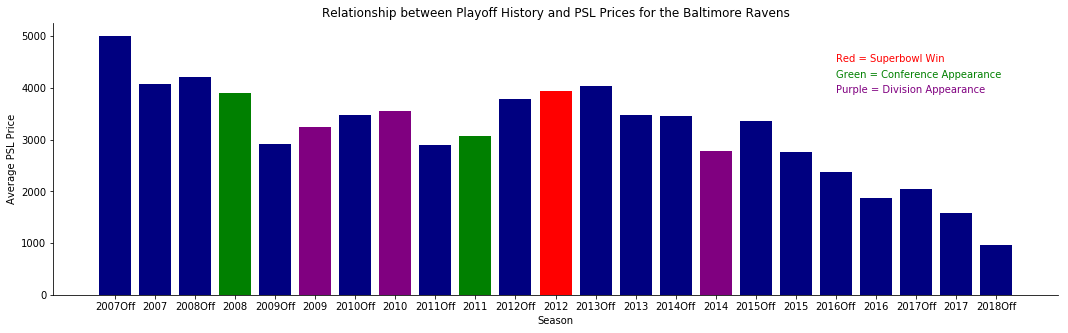

In [145]:
seasons = ["2007Off", "2007", "2008Off", "2008", "2009Off", "2009", "2010Off", "2010", "2011Off", "2011", "2012Off", "2012",
          "2013Off", "2013", "2014Off", "2014", "2015Off", "2015", "2016Off", "2016", "2017Off", "2017", "2018Off"]

fix, ax = plt.subplots(figsize = (18,5)) # Changes size to fit better on screen
 
ax.bar(BAL_analysis2.index, BAL_analysis2, color = "navy") # Base layer

ax.bar(BAL_analysis2[BAL_analysis2.index == "2012 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2012 Season"], color = "red") # Highlights Superbowl win
                          
ax.bar(BAL_analysis2[BAL_analysis2.index == "2008 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2008 Season"], color = "green") # Highlights Conference Appearance

ax.bar(BAL_analysis2[BAL_analysis2.index == "2011 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2011 Season"], color = "green") # Highlights Conference Appearance

ax.bar(BAL_analysis2[BAL_analysis2.index == "2009 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2009 Season"], color = "purple") # Highlights Division Appearance

ax.bar(BAL_analysis2[BAL_analysis2.index == "2010 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2010 Season"], color = "purple") # Highlights Division Appearance

ax.bar(BAL_analysis2[BAL_analysis2.index == "2014 Season"].index,
       BAL_analysis2[BAL_analysis2.index == "2014 Season"], color = "purple") # Highlights Division Appearance
    
ax.set_xticklabels(seasons)

ax.annotate("Red = Superbowl Win", xy = (18, 4500), color = "red") # Identifies what colors indicate on graph
ax.annotate("Green = Conference Appearance", xy = (18, 4200), color = "green")
ax.annotate("Purple = Division Appearance", xy = (18, 3900), color = "purple")

ax.set_title("Relationship between Playoff History and PSL Prices for the Baltimore Ravens")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Season")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Conclusion:** Inconclusive. While prices do rise after 2009 (Division loss), 2011 (Conference loss) and 2012 (Superbowl win), and 2014 (Division loss), they fall *drastically* after 2008 (Conference loss) and 2010 (Division loss).

### Houston Texans

In [135]:
HOU_analysis = team_analysis.get_group("HOU").groupby("Category") # Pulls only team transactions from sample, then groups
                                                                    # by year and in-season vs. offseason

In [136]:
HOU_analysis2 = HOU_analysis["Per Seat Price"].mean() # Takes the average of each year/in-season vs. offseason

In [137]:
HOU_analysis2

Category
2008 Offseason    2105.388480
2008 Season       1860.514925
2009 Offseason    1641.366279
2009 Season       1731.103604
2010 Offseason    1841.852965
2010 Season       1788.346774
2011 Offseason    1898.296875
2011 Season       2460.115333
2012 Offseason    3894.341941
2012 Season       4980.284553
2013 Offseason    5384.090127
2013 Season       5878.320875
2014 Offseason    5775.511404
2014 Season       6136.718750
2015 Offseason    5798.111526
2015 Season       6052.309309
2016 Offseason    5788.705914
2016 Season       4602.602234
2017 Offseason    4248.242101
2017 Season       3325.059295
2018 Offseason    2915.496795
Name: Per Seat Price, dtype: float64

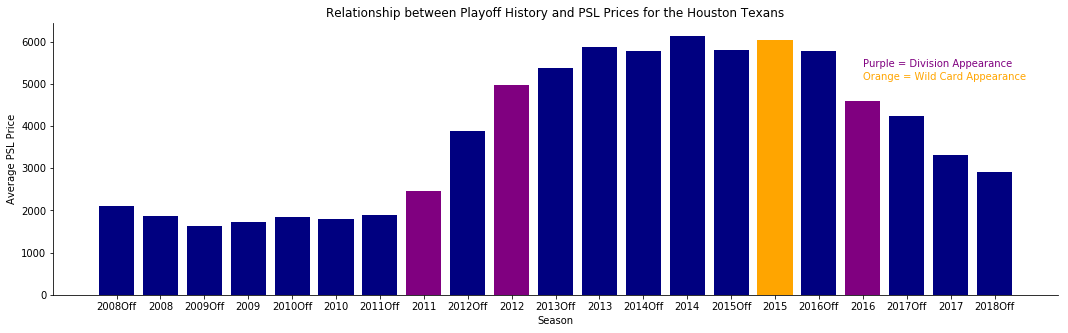

In [144]:
seasons = ["2008Off", "2008", "2009Off", "2009", "2010Off", "2010", "2011Off", "2011", "2012Off", "2012",
          "2013Off", "2013", "2014Off", "2014", "2015Off", "2015", "2016Off", "2016", "2017Off", "2017", "2018Off"]

fix, ax = plt.subplots(figsize = (18,5)) # Changes size to fit better on screen
 
ax.bar(HOU_analysis2.index, HOU_analysis2, color = "navy") # Base layer

ax.bar(HOU_analysis2[HOU_analysis2.index == "2011 Season"].index,
       HOU_analysis2[HOU_analysis2.index == "2011 Season"], color = "purple") # Highlights Division Appearance

ax.bar(HOU_analysis2[HOU_analysis2.index == "2012 Season"].index,
       HOU_analysis2[HOU_analysis2.index == "2012 Season"], color = "purple") # Highlights Division Appearance

ax.bar(HOU_analysis2[HOU_analysis2.index == "2016 Season"].index,
       HOU_analysis2[HOU_analysis2.index == "2016 Season"], color = "purple") # Highlights Division Appearance

ax.bar(HOU_analysis2[HOU_analysis2.index == "2015 Season"].index,
       HOU_analysis2[HOU_analysis2.index == "2015 Season"], color = "orange") # Highlights Wildcard Appearance
    
ax.set_xticklabels(seasons)

ax.annotate("Purple = Division Appearance", xy = (17, 5400), color = "purple") # Identifies what colors indicate on graph
ax.annotate("Orange = Wild Card Appearance", xy = (17, 5100), color = "orange") 

ax.set_title("Relationship between Playoff History and PSL Prices for the Houston Texans")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Season")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Conclusion:** Again, inconclusive. Some other factor is not being captured because prices are rising dramatically towards the 2014 season but the Texans do not have postseason performance to show for it.

### New York Giants

In [139]:
NYG_analysis = team_analysis.get_group("NYG").groupby("Category")

In [140]:
NYG_analysis2 = NYG_analysis["Per Seat Price"].mean()

In [141]:
NYG_analysis2

Category
2011 Offseason    3585.625192
2011 Season       4530.638889
2012 Offseason    4377.750929
2012 Season       4459.748428
2013 Offseason    3986.786990
2013 Season       4618.416667
2014 Offseason    2935.426942
2014 Season       2623.591954
2015 Offseason    2741.052789
2015 Season       3416.927288
2016 Offseason    2592.143750
2016 Season       3049.270588
2017 Offseason    3131.460905
2017 Season       2950.417614
2018 Offseason    2200.272081
Name: Per Seat Price, dtype: float64

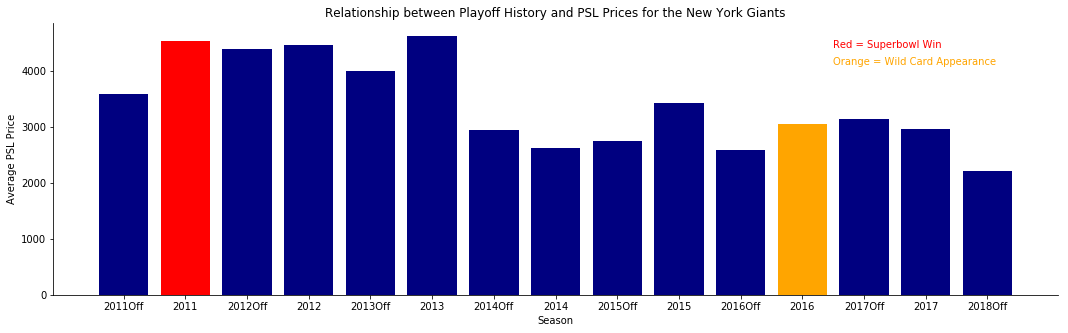

In [143]:
seasons = ["2011Off", "2011", "2012Off", "2012","2013Off", "2013", "2014Off", "2014", "2015Off", "2015", "2016Off", 
           "2016", "2017Off", "2017", "2018Off"]

fix, ax = plt.subplots(figsize = (18,5)) # Changes size to fit better on screen
 
ax.bar(NYG_analysis2.index, NYG_analysis2, color = "navy") # Base layer

ax.bar(NYG_analysis2[NYG_analysis2.index == "2011 Season"].index,
       NYG_analysis2[NYG_analysis2.index == "2011 Season"], color = "red") # Highlights Superbowl win

ax.bar(NYG_analysis2[NYG_analysis2.index == "2016 Season"].index,
       NYG_analysis2[NYG_analysis2.index == "2016 Season"], color = "orange") # Highlights Wildcard Appearance
    
ax.set_xticklabels(seasons)

ax.annotate("Red = Superbowl Win", xy = (11.5, 4400), color = "red") # Identifies what colors indicate on graph
ax.annotate("Orange = Wild Card Appearance", xy = (11.5, 4100), color = "orange") 

ax.set_title("Relationship between Playoff History and PSL Prices for the New York Giants")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Season")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Conclusion:** Prices rose after the Wild card appearance but not after the Superbowl win..... Really not intuitive....

### Pittsburgh Steelers

In [146]:
PIT_analysis = team_analysis.get_group("PIT").groupby("Category")

In [147]:
PIT_analysis2 = PIT_analysis["Per Seat Price"].mean()

In [148]:
PIT_analysis2

Category
2010 Offseason     8260.106183
2010 Season       11194.476744
2011 Offseason     8024.220370
2011 Season        8339.887006
2012 Offseason     8540.369444
2012 Season        8229.346774
2013 Offseason     8369.801136
2013 Season        6256.597222
2014 Offseason     5165.271766
2014 Season        4964.926768
2015 Offseason     4587.772096
2015 Season        3612.959119
2016 Offseason     4245.614539
2016 Season        4936.986842
2017 Offseason     4791.968701
2017 Season        4120.709722
2018 Offseason     4138.769900
Name: Per Seat Price, dtype: float64

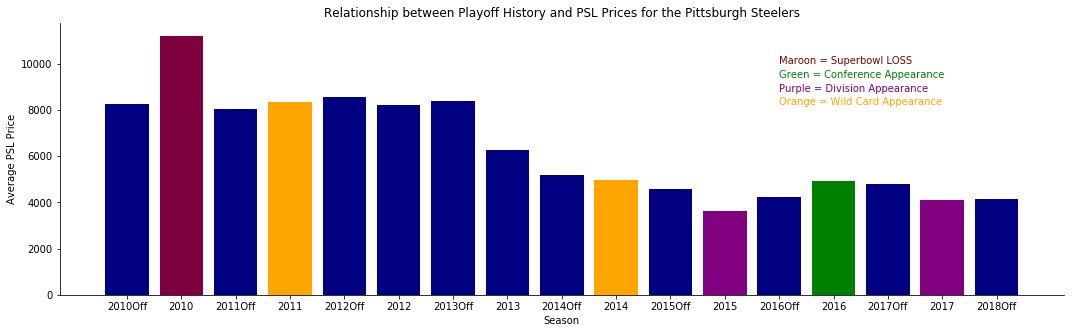

In [162]:
seasons = ["2010Off", "2010", "2011Off", "2011", "2012Off", "2012",
          "2013Off", "2013", "2014Off", "2014", "2015Off", "2015", "2016Off", "2016", "2017Off", "2017", "2018Off"]

fix, ax = plt.subplots(figsize = (18,5)) # Changes size to fit better on screen
 
ax.bar(PIT_analysis2.index, PIT_analysis2, color = "navy") # Base layer

ax.bar(PIT_analysis2[PIT_analysis2.index == "2010 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2010 Season"], color = "red", alpha = 0.5) # Highlights Superbowl LOSS, not win
                          
ax.bar(PIT_analysis2[PIT_analysis2.index == "2016 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2016 Season"], color = "green") # Highlights Conference Appearance

ax.bar(PIT_analysis2[PIT_analysis2.index == "2015 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2015 Season"], color = "purple") # Highlights Division Appearance

ax.bar(PIT_analysis2[PIT_analysis2.index == "2017 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2017 Season"], color = "purple") # Highlights Division Appearance

ax.bar(PIT_analysis2[PIT_analysis2.index == "2011 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2011 Season"], color = "orange") # Highlights Wildcard Appearance

ax.bar(PIT_analysis2[PIT_analysis2.index == "2014 Season"].index,
       PIT_analysis2[PIT_analysis2.index == "2014 Season"], color = "orange") # Highlights Wildcard Appearance
    
ax.set_xticklabels(seasons)

ax.annotate("Maroon = Superbowl LOSS", xy = (12, 10000), color = "maroon") # Identifies what colors indicate on graph
ax.annotate("Green = Conference Appearance", xy = (12, 9400), color = "green")
ax.annotate("Purple = Division Appearance", xy = (12, 8800), color = "purple")
ax.annotate("Orange = Wild Card Appearance", xy = (12, 8200), color = "orange") 

ax.set_title("Relationship between Playoff History and PSL Prices for the Pittsburgh Steelers")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Season")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Conclusion:** Again, no clear indication that playoff performances are affecting the Steelers one way or another. Huge decline in 2011 Offseason despite making it to the SuperBowl in 2010. 

### Seattle Seahawks

In [163]:
SEA_analysis = team_analysis.get_group("SEA").groupby("Category")

In [164]:
SEA_analysis2 = SEA_analysis["Per Seat Price"].mean()

In [165]:
SEA_analysis2

Category
2012 Offseason     2929.880952
2012 Season        5509.988095
2013 Offseason     7442.035088
2013 Season       11107.500000
2014 Offseason    12305.355263
2014 Season       13087.777778
2015 Offseason    15962.633333
2015 Season       19486.111111
2016 Offseason    14451.275362
2016 Season       14152.458333
2017 Offseason    14650.289855
2017 Season       18370.000000
2018 Offseason    16900.000000
Name: Per Seat Price, dtype: float64

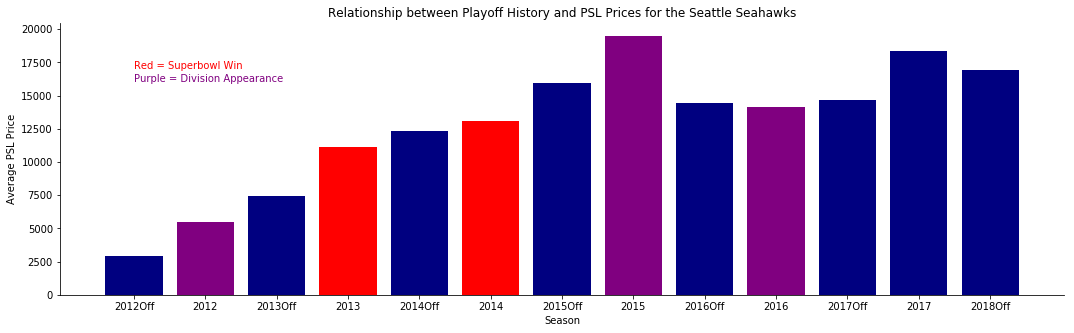

In [179]:
seasons = ["2012Off", "2012","2013Off", "2013", "2014Off", "2014", "2015Off",
           "2015", "2016Off", "2016", "2017Off", "2017", "2018Off"]

fix, ax = plt.subplots(figsize = (18,5)) # Changes size to fit better on screen
 
ax.bar(SEA_analysis2.index, SEA_analysis2, color = "navy") # Base layer

ax.bar(SEA_analysis2[SEA_analysis2.index == "2013 Season"].index,
       SEA_analysis2[SEA_analysis2.index == "2013 Season"], color = "red") # Highlights Superbowl Win

ax.bar(SEA_analysis2[SEA_analysis2.index == "2014 Season"].index,
       SEA_analysis2[SEA_analysis2.index == "2014 Season"], color = "red") # Highlights Superbowl Win

ax.bar(SEA_analysis2[SEA_analysis2.index == "2012 Season"].index,
       SEA_analysis2[SEA_analysis2.index == "2012 Season"], color = "purple") # Highlights Division Appearance

ax.bar(SEA_analysis2[SEA_analysis2.index == "2015 Season"].index,
       SEA_analysis2[SEA_analysis2.index == "2015 Season"], color = "purple") # Highlights Division Appearance

ax.bar(SEA_analysis2[SEA_analysis2.index == "2016 Season"].index,
       SEA_analysis2[SEA_analysis2.index == "2016 Season"], color = "purple") # Highlights Division Appearance
    
ax.set_xticklabels(seasons)

ax.annotate("Red = Superbowl Win", xy = (0, 17000), color = "Red") # Identifies what colors indicate on graph
ax.annotate("Purple = Division Appearance", xy = (0, 16000), color = "purple")

ax.set_title("Relationship between Playoff History and PSL Prices for the Seattle Seahawks")
ax.set_ylabel("Average PSL Price") 
ax.set_xlabel("Season")

ax.spines["right"].set_visible(False) # Removes border from right
ax.spines["top"].set_visible(False) # Removes border from top

plt.show()

**Conclusion:** The Seattle Seahawks most closely resemble our originaly hypothesis, where postseason appearances cause PSL prices to increase in the following offseason. However, even with this model team, we see that PSL prices drastically fell in the 2016 offseason despite their division appearance.

----

## Conclusion: Summary and Discussion

This project sought to determine how on-field performance during the NFL post-season, specifically Superbowl wins, affect secondary market sales of NFL personal seat licenses (PSLs). To summarize:

**Analysis 1: There is a large discrepancy between the average prices of various NFL teams.**

The relatively high prices of Seattle Seahawks PSLs led us to believe differences could be attributed to the quality of on-field performance.

**Analysis 2: Average prices in the off-season are higher than the average prices during seasons.**

The higher prices in the offseason again prompt us to consider post-season performance as the factor driving up sales prices.

**Analysis 3: The PSLs for 3 out of 4 teams were more expensive following SuperBowl win.**

The average prices for the Baltimore Ravens, Philadelpha Eagles and Seattle Seahawks were higher than the average of the season leading up to the win (Benchmark 1), the average of all the team's transactions (Benchmark 2) and the average of all the team's offseason transactions (Benchmark 3). However, the price of New York Giants PSLs actually decreased after winning the SuperBowl. This led to the consideration that the effect of post-season performances is not as clear-cut as hypothesized.

**Analysis 4: The impact of post-season performances on PSL prices is inconclusive and has no clear correlation in either direction.**

After looking at PSL price behavior following post-season appearances for the Baltimore Ravens, Houston Texans, New York Giants, Pittsburgh Steelers and Seattle Seahawks, there was no clear indication that postseason appearances increased PSL prices of the following postseason.


### Moving Forward...

Since I was unable to determine a clear relationship between post-season appearances/performances and PSL prices, it's clear that there must be another factor driving up PSL prices in the offseason and for particular teams. For example, it may not be whether the team qualifies for the playoffs or wins a round but how the fans view the team's ability to win in the future based on its roster and expected off-season moves. 